In [ ]:
# Setup, Version check and Common imports

# Python ≥3.8 is required
import sys
assert sys.version_info >= (3, 5)


# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

from tensorflow import keras
from tensorflow.keras import layers

# to make this notebook's output stable across runs
np.random.seed(42)

import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [ ]:

# Load CIFAR100 dataset from keras datasets:
# https://keras.io/api/datasets/cifar100/
# https://www.cs.toronto.edu/~kriz/cifar.html

# The load_data() method creates train and test sets. The parameter label_mode specifies the category labels: 'fine' or 'coarse'
# In this class we will adopt the coarse classification, corresponding to 20 categories

from keras.datasets import cifar100

(train_images_full, train_labels_full), (test_images, test_labels) = cifar100.load_data(label_mode = 'coarse')

train_labels_full = train_labels_full.squeeze()
test_labels = test_labels.squeeze()

# We further divide the original train datasets into train and validation datasets
train_images = train_images_full[5000:]
valid_images = train_images_full[:5000]

train_labels = train_labels_full[5000:]
valid_labels = train_labels_full[:5000]


169001437/169001437 [==============================] - 2s 0us/step


In [ ]:

# Complete this section
# Confirm the dimensions of all tensors previously created

# PLACE CODE HERE



(45000, 32, 32, 3)

Quiz:

What is the shape of the tensors? These dimensions correspond to what?

How many elements does each of these sets have?

Why do we need three sets?

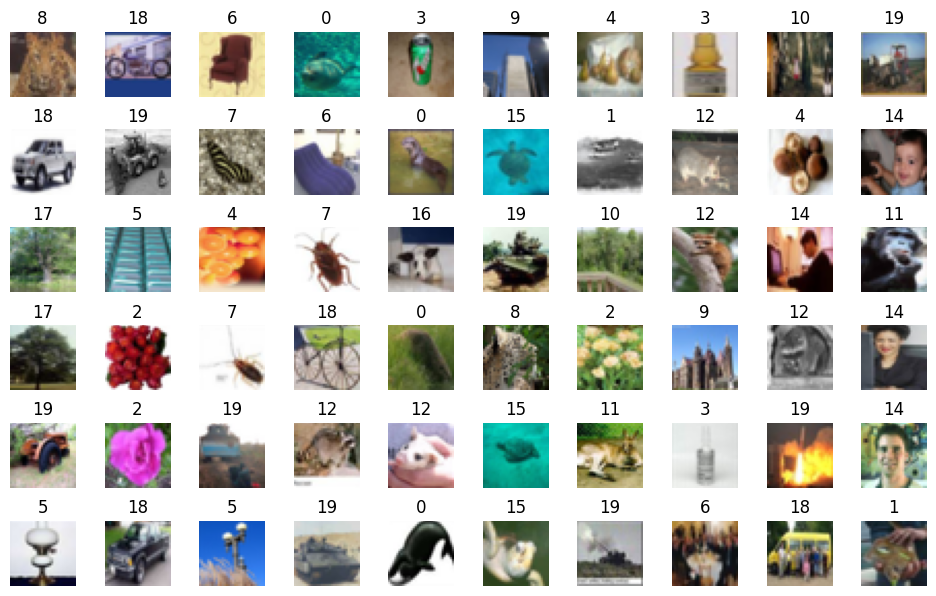

In [ ]:
# Visualize a few examples
# Check here for the identification of the classes: https://www.cs.toronto.edu/~kriz/cifar.html

n_rows = 6
n_cols = 10

# Change the value of start to visualize different examples
start = 0

plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(train_images[index + start])
        plt.axis('off')
        plt.title(train_labels[index + start], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)


In [ ]:
# Build a feed-forward NN with Keras Sequential API: https://keras.io/api/models/

# The base architecture is similar to the one used in the previous class
# Complete the missing details:

model = keras.Sequential([
    layers.Flatten(input_shape=[32,32,3]),


    # Complete model definition

])



Quiz:

Explain all the details of the NN that was just created: Number of input nodes, number of output nodes, number of hidden layers and selection of activation functions.


In [ ]:
# Present a summary of the network architecture

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 20)                10260     
                                                                 
Total params: 1583636 (6.04 MB)
Trainable params: 1583636 (6.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Layer detailed analysis

hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

print('Layer ', hidden1.name)
print('Weights with shape ', weights.shape, ' :\n', weights)
print('Biases with shape ', biases.shape, ' :\n', biases)


Layer  dense
Weights with shape  (3072, 512)  :
 [[-0.0304132   0.00443667 -0.03044722 ... -0.03232056 -0.01555083
  -0.02131819]
 [ 0.01582912 -0.03715707 -0.00552975 ...  0.02705269  0.00630038
   0.01658801]
 [-0.02907427  0.00408122  0.03241111 ... -0.02844669  0.00472627
  -0.01919417]
 ...
 [-0.00842143  0.01217351  0.00797898 ...  0.00503458  0.01055139
   0.0119892 ]
 [-0.02575431 -0.03812788  0.03042576 ... -0.0193663   0.02617099
   0.03720453]
 [-0.02165691  0.02697103 -0.00051985 ...  0.01619791  0.0031071
  -0.00159559]]
Biases with shape  (512,)  :
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

Quiz:

How many weights has the NN?

How many weights has the layer that was selected for detailed inspection?

How were these weights initialized?



In [ ]:
# Model compilation: https://keras.io/api/models/model_training_apis/
# Three components have to be defined:
# 1. the Optimizer to be used in training
# 2. The loss function
# 3. The evaluation metric

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.01),
              metrics=["accuracy"])



In [ ]:
# Model training
# Hyper-parameters: batch size and epochs
# Validation datasets can also be provided

# It returns a history object.
# Its History.history attribute is a record of training loss values and metrics values at successive epochs,
# as well as validation loss values and validation metrics values (if applicable).

history = model.fit(train_images, train_labels, batch_size=32, epochs=20,
                    validation_data=(valid_images, valid_labels))



Epoch 1/20
1407/1407 [==============================] - 20s 14ms/step - loss: 2.9958 - accuracy: 0.0626 - val_loss: 2.9972 - val_accuracy: 0.0662
Epoch 2/20
1407/1407 [==============================] - 21s 15ms/step - loss: 2.9595 - accuracy: 0.0797 - val_loss: 2.9503 - val_accuracy: 0.0726
Epoch 3/20
1407/1407 [==============================] - 19s 14ms/step - loss: 2.9065 - accuracy: 0.0977 - val_loss: 2.8850 - val_accuracy: 0.1002
Epoch 4/20
1407/1407 [==============================] - 20s 14ms/step - loss: 2.8802 - accuracy: 0.1024 - val_loss: 2.8816 - val_accuracy: 0.1006
Epoch 5/20
1407/1407 [==============================] - 19s 13ms/step - loss: 2.8546 - accuracy: 0.1084 - val_loss: 2.8917 - val_accuracy: 0.0926
Epoch 6/20
1407/1407 [==============================] - 18s 13ms/step - loss: 2.8667 - accuracy: 0.1068 - val_loss: 2.8456 - val_accuracy: 0.1170
Epoch 7/20
1407/1407 [==============================] - 20s 14ms/step - loss: 2.8478 - accuracy: 0.1088 - val_loss: 2.8727 -

In [ ]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

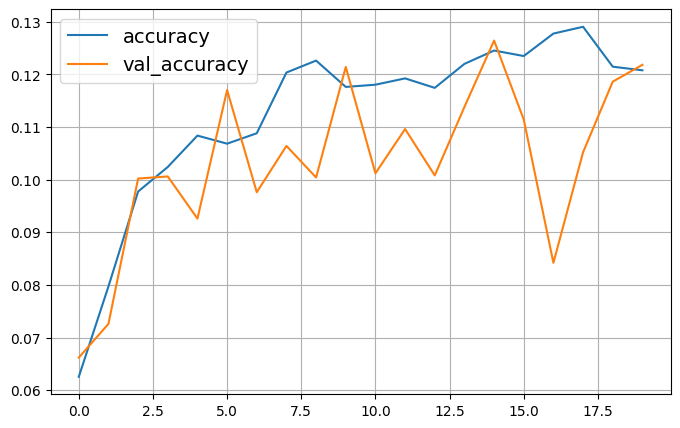

In [ ]:

# Plot the evolution of the accuracy metrics

import pandas as pd

x = pd.DataFrame(history.history, columns = ['accuracy', 'val_accuracy'])
x.plot(figsize=(8, 5))
plt.grid(True)
plt.show()



In [ ]:

# Evaluation the generalization ability of the model
# The test set will be used in this step
# Classification of a set of examples can be performed using the evaluate() method:  https://keras.io/api/models/model_training_apis/

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")


313/313 [==============================] - 3s 8ms/step - loss: 2.8308 - accuracy: 0.1233
Test Accuracy: 0.12330000102519989


Quiz:

How do you analyze these results?

What is the difference between the validation and test datasets?

Suggest some strategies to enhance accuracy.



In [ ]:
# Save the model. All models details (architecture, configuration, weights) can be saved to disk.
# The method save creates a folder with all the information

model.save("Modelo_Aula2")

# The model can be later retrieved with the method load_model()


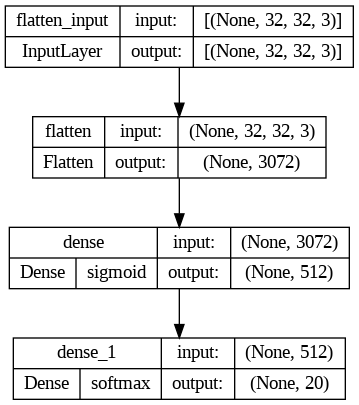

In [ ]:
# Convert model to png and save it to a file

dot_img_file = 'model1.png'
keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True, show_layer_activations=True)



Challenge

The performance of the neural network is poor. Design and test several changes, aiming at improving its performance.

Some possibilites that can be tested are:

i. Normalize the inputs: Try normalizing the inputs (together with a conversion to real values) and check if the performance changes

ii. The proposed neural network may not be the most suitable for this problem. Change its architecture (number of layers / number of neurons per layer) and document how performance changes. The following constraints apply:

a. The Keras Sequential API must be used

b. Only Flatten and Dense layers can be used

c. Activation functions: Sigmoid, Tanh, SoftMax

d. Optimizer: SGD

e. Budget: 3 million weights

Perform some tests, document how results change and present a simple analysis of the outcome.




In [ ]:
# Code goes here
